Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Artem Burtsev"
COLLABORATORS = "Me and only"

---

# Derivatives: Finite difference schemes

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$ (e.g., use a central difference scheme). 

In [2]:
import numpy as np

def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the symmetric scheme.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    return (f(x + h) - f(x - h)) / (2*h)

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Are your results consistent with the expected value of $f'(x) = 0$? Are they consistent with the expected scaling of the error with $h\to 0$?

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 --  0.0001
0.001000 --   1e-06
0.000100 --   1e-08
0.000010 --   1e-10


In [4]:
from numpy.testing import assert_allclose

assert_allclose(deriv(lambda x: x**3, 0, h=1e-4),
                0, atol=1e-6)
assert_allclose(deriv(lambda x: x**4, 1, h=1e-7),
                4, atol=1e-6)

from math import log
assert_allclose(deriv(lambda x: x**2 * log(x), 1, h=1e-5),
                1, atol=1e-6)

## One-sided finite difference schemes

Now implement two one-sided finite difference schemes for the first derivative: a two-point forward difference and a three-point forward difference. 

Test your functions on $f(x) = x^2 \log{x}$ at $x = 1$.
Study the dependence of the error with $h$. Roughly estimate the value of the step size $h$ where the error stops decreasing.  While the error still decreses with $h$, what is the scaling of the error, is it $O(h)$ or $O(h^2)$?

In [5]:
from math import log

def func(x):
    return x**2 * log(x)


def deriv_forward_2pt(f, x, h):
    """Estimate $df/dx$ at x using a two-point forward difference scheme."""
    return (f(x + h) - f(x)) / h

def deriv_forward_3pt(f, x, h):
    """Estimate $df/dx$ at x using a three-point forward difference scheme."""
    return 1/(2*h) * (-3*f(x) + 4*f(x + h) - f(x + 2*h))

In [6]:
# Test your functions

assert_allclose(deriv_forward_2pt(func, 1, h=1e-5),
                1, atol=1e-4)

assert_allclose(deriv_forward_3pt(func, 1, h=1e-5),
                1, atol=1e-6)

for h=10 2-point error is 28.014532800860287
for h=10 3-point error is 10.1026541500809


for h=1 2-point error is 1.7725887222397811
for h=1 3-point error is 0.3985778545269314


for h=0.1 2-point error is 0.15325317563233187
for h=0.1 3-point error is 0.006208857651809341


for h=0.01 2-point error is 0.015033250331677017
for h=0.01 3-point error is 6.617128391550597e-05


for h=0.001 2-point error is 0.001500333249922825
for h=0.001 3-point error is 6.661673545016455e-07


for h=0.0001 2-point error is 0.0001500033331398587
for h=0.0001 3-point error is 6.666276863853682e-09


for h=1e-05 2-point error is 1.5000039884416339e-05
for h=1e-05 3-point error is 4.901246075661447e-11




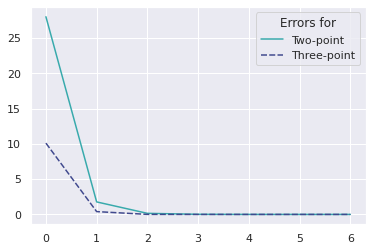

In [7]:
# Study the dependce of the error, estimate the value of h where the error stops decreasing. 
# Are your results consistent with the O(h) or O(h^2) scaling of the error?
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

twoP_error, threeP_error = [], []
for h in [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
    error2 = np.abs(1 - deriv_forward_2pt(func, 1, h))
    error3 = np.abs(1 - deriv_forward_3pt(func, 1, h))
    twoP_error.append(error2)
    threeP_error.append(error3)
    print(f'for h={h} 2-point error is {error2}')
    print(f'for h={h} 3-point error is {error3}')
    print('\n')
    
palette = sns.color_palette("mako_r", 2)

g = sns.lineplot(data = [twoP_error,threeP_error], palette=palette, legend='full')
plt.legend(title='Errors for', loc='upper right', labels=['Two-point', 'Three-point'])
plt.show(g)

### One-sided differences at a boundary

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 

In [8]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    der = deriv_forward_3pt(f, x, h)
    print("%5f -- %7.4g" % (h, der))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


The error scaling correlates the step. As small is the step, as small is the error

In [9]:
assert_allclose(deriv_forward_3pt(f, 0, h=1e-5),
                0, atol=1e-3)